In [2]:
import csv
import pandas as pd
import numpy as np
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import seaborn as sns
import matplotlib as plt
%matplotlib inline
data = pd.read_csv("train.csv")
dataDictionary = pd.read_csv("DataDictionary.csv")
datagroup=data.groupby(['User_ID','Gender','Age','Occupation','City_Category','Stay_In_Current_City_Years','Marital_Status']).sum().reset_index()
datagroup=datagroup.drop(['Product_Category_1','Product_Category_2','Product_Category_3'],axis=1)

## The Data Set

In [3]:
data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [4]:
dataDictionary

,Term,Data_type,Example,Unique values,Description
0,User_ID,int64,100006,5891,Unique ID for customer
1,Product_ID,string,P0096642,3631,Unique ID for purchased product
2,Gender,string,F,2,M for male and F for female
3,Age,string,36-45,7,Age-range for customer
4,Occupation,int64,12,21,Occupation of the customer
5,City_Category,string,B,3,City of Residence
6,Stay_In_Current_City_Years,string,4+,5,How many years of residence in city
7,Marital_Status,int64,1,2,1 for married and 0 for single
8,Product_Category_1,int64,1,20,Category 1 for purchased product
9,Product_Category_2,float64,14,17,Category 2 for purchased product


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [6]:
data.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [7]:
print('Unique Values: \n')
for i in data.columns:
    print(i, ':',data[i].nunique())

Unique Values: 

User_ID : 5891
Product_ID : 3631
Gender : 2
Age : 7
Occupation : 21
City_Category : 3
Stay_In_Current_City_Years : 5
Marital_Status : 2
Product_Category_1 : 20
Product_Category_2 : 17
Product_Category_3 : 15
Purchase : 18105


In [8]:
print('Number of products:',data['Product_ID'].nunique())
print('Number of values in categories:',data['Product_Category_1'].unique().max())
print('Highest and lowest product price:',
      data['Purchase'].max(),',',data['Purchase'].min())

Number of products: 3631
Number of values in categories: 20
Highest and lowest product price: 23961 , 12


In [9]:
datagroup

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Purchase
0,1000001,F,0-17,10,A,2,0,334093
1,1000002,M,55+,16,C,4+,0,810472
2,1000003,M,26-35,15,A,3,0,341635
3,1000004,M,46-50,7,B,2,1,206468
4,1000005,M,26-35,20,A,1,1,821001
...,...,...,...,...,...,...,...,...
5886,1006036,F,26-35,15,B,4+,1,4116058
5887,1006037,F,46-50,1,C,4+,0,1119538
5888,1006038,F,55+,1,C,2,0,90034
5889,1006039,F,46-50,0,B,4+,1,590319


## Data Analysis

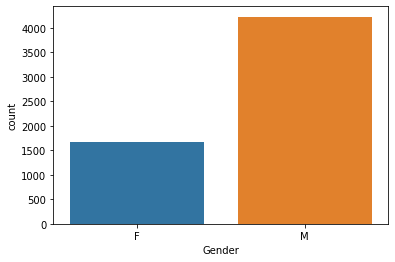

In [15]:
sns.countplot(datagroup['Gender'])

In [14]:
print('Number of Shoppers:',data['User_ID'].nunique())
print('Years in City Groups:',data['Stay_In_Current_City_Years'].unique())
print('Age Groups:',data['Age'].unique())

Number of Shoppers: 5891
Years in City Groups: ['2' '4+' '3' '1' '0']
Age Groups: ['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']


In [16]:
print('Total products bought by females:',round(data[data['Gender']=='F']['Product_ID'].count()))
print('Total products bought by males:',round(data[data['Gender']=='M']['Product_ID'].count()))

Total products bought by females: 135809
Total products bought by males: 414259


In [17]:
datagroup_Bool_Gender = pd.get_dummies(datagroup, columns=['Gender'], drop_first=True)
datagroup_Bool_Gender['Gender_M'].mean()

0.7171957222882362

In [18]:
print('Highest and lowest purchase in total by customers:',
      datagroup['Purchase'].max(),',',datagroup['Purchase'].min())
count_male = datagroup[datagroup["Gender"]=='M'].count()[0]
count_female = datagroup[datagroup["Gender"]=='F'].count()[0]
print('Number of male customers:',count_male)
print('Number of female customers:',count_female)

Highest and lowest purchase in total by customers: 10536909 , 46681
Number of male customers: 4225
Number of female customers: 1666


In [19]:
datawCategory = data.copy()
datawCategory["MaxC"] = datawCategory[["Product_Category_1", "Product_Category_2", "Product_Category_3"]].idxmax(axis=1)
datawCategory = datawCategory.drop(["Product_Category_1", "Product_Category_2", "Product_Category_3"], axis=1)
datawCategory

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Purchase,MaxC
0,1000001,P00069042,F,0-17,10,A,2,0,8370,Product_Category_1
1,1000001,P00248942,F,0-17,10,A,2,0,15200,Product_Category_3
2,1000001,P00087842,F,0-17,10,A,2,0,1422,Product_Category_1
3,1000001,P00085442,F,0-17,10,A,2,0,1057,Product_Category_2
4,1000002,P00285442,M,55+,16,C,4+,0,7969,Product_Category_1
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,368,Product_Category_1
550064,1006035,P00375436,F,26-35,1,C,3,0,371,Product_Category_1
550065,1006036,P00375436,F,26-35,15,B,4+,1,137,Product_Category_1
550066,1006038,P00375436,F,55+,1,C,2,0,365,Product_Category_1


'Fig. 1'

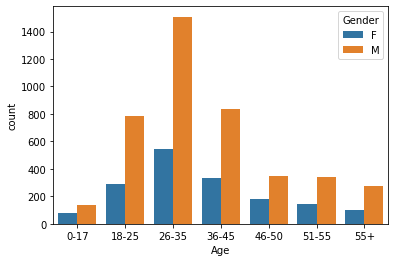

In [20]:
plotAge = datagroup.sort_values('Age', ascending=True)
sns.countplot(plotAge['Age'], hue = plotAge['Gender'])
"Fig. 1"

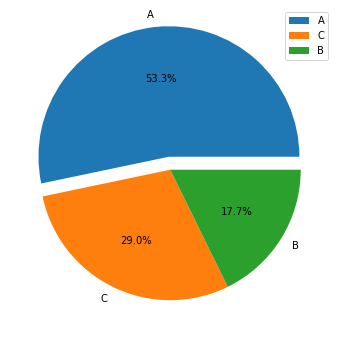

In [21]:
import matplotlib.pyplot as plt1
explode = (0.1, 0, 0)
fig1, ax1 = plt1.subplots(figsize=(11,6))
ax1.pie(datagroup['City_Category'].value_counts(), explode=explode, labels=data['City_Category'].unique(), autopct='%1.1f%%')
plt1.legend()
plt1.show()

In [23]:
dataMatrix = data.copy()
dataMatrix["MaxC"] = dataMatrix[["Product_Category_1", "Product_Category_2", "Product_Category_3"]].idxmax(axis=1)
dataMatrix = dataMatrix[["User_ID","Product_ID","MaxC"]]

dataMatrix = dataMatrix.pivot(index="User_ID", columns="Product_ID", values="MaxC")
dataMatrix = dataMatrix.replace("Product_Category_1", 1)
dataMatrix = dataMatrix.replace("Product_Category_2", 1)
dataMatrix = dataMatrix.replace("Product_Category_3", 1)
dataMatrix = dataMatrix.fillna(0)
dataMatrix


Product_ID,P00000142,P00000242,P00000342,P00000442,P00000542,P00000642,P00000742,P00000842,P00000942,P00001042,...,P0098942,P0099042,P0099142,P0099242,P0099342,P0099442,P0099642,P0099742,P0099842,P0099942
User_ID,,,,,,,,,,,,,,,,,,,,,
1000001,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1000002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1000003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1000004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1000005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1006036,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1006037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1006038,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### This is how the data should like, but with True and False instead of one and zeros. We also have to remove the User_ID column.

In [25]:
dataStripped = data.copy()
dataStripped = dataStripped[["User_ID","Product_ID"]]
dataStripped = dataStripped.groupby("User_ID").Product_ID.apply(list).reset_index()
dataStripped = dataStripped.drop(["User_ID"], axis=1)

dataStripped["Product_ID"] = dataStripped["Product_ID"].str.join(", ")
dataStripped["Product_ID"] = dataStripped["Product_ID"].str.strip("[]''")
dataStripped["Product_ID"]


0       P00069042, P00248942, P00087842, P00085442, P0...
1       P00285442, P00112842, P00293242, P00289342, P0...
2       P00193542, P00132842, P0098342, P00010242, P00...
3       P00184942, P00346142, P0097242, P00046742, P00...
4       P00274942, P00251242, P00014542, P00031342, P0...
                              ...                        
5886    P00237642, P00250342, P00173242, P00255342, P0...
5887    P00067342, P00111842, P00323642, P00177442, P0...
5888    P00034742, P00251242, P00086042, P00109542, P0...
5889    P00114042, P00199442, P00088542, P00254242, P0...
5890    P00184042, P00158742, P00001742, P00148642, P0...
Name: Product_ID, Length: 5891, dtype: object

#### We need to make sure the data is in the correct format to be able to do our association analysis. We remove all columns but Product_ID and remove unnecessary characters ("[]'"). As the dataset wasn't made for this kind of association analysis, this was the difficult part. We had to make sure we got the correct data and in the right format by sorting by User_ID and then removing User_ID.

In [31]:
#np.savetxt("nyfilavlistor.csv", dataStripped, delimiter=",", fmt="%s")

#### Here we save the dataStripped as a .csv file, with all values separated with a comma. We don't need to do this when we already have the file in our directory, but this is how we got it there in the first place.

In [33]:
with open("nyfilavlistor.csv") as produkt_file:
    dataset = list(csv.reader(produkt_file))
#dataset     # Remove hashtag to see what the file looks like (takes up a lot of space)

#### Now we name the file "dataset" and make it ready for our matrix.

In [34]:
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
produkter = pd.DataFrame(te_ary, columns=te.columns_)
produkter.head(10)

,P00000142,P00000242,P00000342,P00000442,P00000542,P00000642,P00000742,P00000842,P00000942,P00001042,...,P0097742,P0097842,P0098242,P0098442,P0099042,P0099242,P0099342,P0099442,P0099842,P0099942
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


#### The data is now put in the correct format; a true and false matrix.

In [35]:
def item_frequency(dataset):
    return dataset.sum() / len(dataset) * 100
item_frequency(produkter)

 P00000142    19.232728
 P00000242     6.365643
 P00000342     4.141911
 P00000442     1.561704
 P00000542     2.529282
                ...    
P0099242       0.033950
P0099342       0.084875
P0099442       0.016975
P0099842       0.016975
P0099942       0.016975
Length: 5240, dtype: float64

#### How often a product appears in the dataset.

In [38]:
frequent_itemsets = apriori(produkter, min_support=0.05, use_colnames=True)
frequent_itemsets      # Takes time

,support,itemsets
0,0.192327,( P00000142)
1,0.063656,( P00000242)
2,0.086233,( P00000642)
3,0.084705,( P00001042)
4,0.096928,( P00001142)
...,...,...
1950,0.056018,"( P00329542, P00270942)"
1951,0.050416,"( P00334242, P00270942)"
1952,0.062808,"( P00270942, P0097242)"
1953,0.052792,"( P00334242, P00278642)"


#### Filter out itemsets with less than 0.05 support. 

The reason why the support-score is so low is because our dataset contains many products and baskets, therefore making the score low as it is calculated based on the total number of transactions.

In [39]:
produkt_rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)
produkt_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,( P00003442),( P00000142),0.161433,0.192327,0.060601,0.375394,1.951852,0.029553,1.293092
1,( P00000142),( P00003442),0.192327,0.161433,0.060601,0.315093,1.951852,0.029553,1.224351
2,( P00010742),( P00000142),0.222713,0.192327,0.057715,0.259146,1.347424,0.014881,1.090192
3,( P00000142),( P00010742),0.192327,0.222713,0.057715,0.300088,1.347424,0.014881,1.110551
4,( P00025442),( P00000142),0.265150,0.192327,0.071465,0.269526,1.401394,0.020469,1.105683
...,...,...,...,...,...,...,...,...,...
2771,( P0097242),( P00270942),0.153964,0.192837,0.062808,0.407938,2.115462,0.033118,1.363310
2772,( P00334242),( P00278642),0.180784,0.201664,0.052792,0.292019,1.448049,0.016335,1.127624
2773,( P00278642),( P00334242),0.201664,0.180784,0.052792,0.261785,1.448049,0.016335,1.109724
2774,( P00334242),( P00338442),0.180784,0.121032,0.053302,0.294836,2.436013,0.031421,1.246472


####  A display of the rules and the respective scores each rule has. We also filter out rules with less than 0.1 in confidence.

In [40]:
produkt_rules[(produkt_rules.confidence > 0.5)
              & (produkt_rules.lift > 1.8)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
373,( P00111742),( P00025442),0.115600,0.265150,0.059073,0.511013,1.927259,0.028422,1.502801
437,( P00243942),( P00025442),0.115940,0.265150,0.059582,0.513909,1.938181,0.028841,1.511754
551,( P00030842),( P00237542),0.100153,0.232049,0.051265,0.511864,2.205847,0.028024,1.573233
1179,( P00057942),( P00110742),0.132405,0.267187,0.066542,0.502564,1.880944,0.031165,1.473180
1762,( P00193542),( P00110742),0.103039,0.267187,0.051604,0.500824,1.874430,0.024074,1.468044
1902,( P00120042),( P00110942),0.151927,0.224750,0.076218,0.501676,2.232155,0.042072,1.555715
2186,( P00329542),( P00114942),0.118825,0.197759,0.061959,0.521429,2.636683,0.038460,1.676324
2398,( P00140742),( P00145042),0.134273,0.233577,0.067730,0.504425,2.159569,0.036367,1.546533
2428,( P00154042),( P00145042),0.104906,0.233577,0.052623,0.501618,2.147553,0.028119,1.537823
2522,( P00154042),( P00270942),0.104906,0.192837,0.052623,0.501618,2.601261,0.032393,1.619568


#### More filtering, showing rules with confidence > 0.5 and lift > 1.8.

In [41]:
produkt_rules[(produkt_rules.lift > 2.6)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
788,( P00044442),( P00127242),0.185877,0.101171,0.050246,0.270320,2.671901,0.031441,1.231812
789,( P00127242),( P00044442),0.101171,0.185877,0.050246,0.496644,2.671901,0.031441,1.617392
1190,( P00120042),( P00057942),0.151927,0.132405,0.054660,0.359777,2.717235,0.034544,1.355143
1191,( P00057942),( P00120042),0.132405,0.151927,0.054660,0.412821,2.717235,0.034544,1.444317
1406,( P00071442),( P00086442),0.122899,0.161602,0.051944,0.422652,2.615381,0.032083,1.452153
1407,( P00086442),( P00071442),0.161602,0.122899,0.051944,0.321429,2.615381,0.032083,1.292569
1430,( P00140742),( P00073842),0.134273,0.156849,0.057206,0.426043,2.716255,0.036145,1.469013
1431,( P00073842),( P00140742),0.156849,0.134273,0.057206,0.364719,2.716255,0.036145,1.362746
1556,( P00086442),( P00323942),0.161602,0.134103,0.056866,0.351891,2.624036,0.035195,1.336036
1557,( P00323942),( P00086442),0.134103,0.161602,0.056866,0.424051,2.624036,0.035195,1.455679


In [42]:
antecedent = datawCategory.loc[(datawCategory["Product_ID"] == 'P00193542')]
consequent = datawCategory.loc[(datawCategory["Product_ID"] == 'P00120042')]
antecedent.columns = ['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category','Stay_In_Current_City_Years', 'Marital_Status', 'Purchase', 'Category']
# Just renames 'MaxC' to 'Category'
antecedent

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Purchase,Category
5,1000003,P00193542,M,26-35,15,A,3,0,15227,Product_Category_2
217,1000036,P00193542,M,26-35,3,B,0,0,19278,Product_Category_2
989,1000169,P00193542,M,26-35,7,B,3,0,19252,Product_Category_2
2501,1000403,P00193542,M,18-25,4,A,2,0,19022,Product_Category_2
2680,1000425,P00193542,M,26-35,12,B,1,1,7897,Product_Category_2
...,...,...,...,...,...,...,...,...,...,...
541278,1005351,P00193542,F,46-50,1,C,4+,1,15421,Product_Category_2
542443,1005530,P00193542,F,18-25,4,B,0,0,15916,Product_Category_2
543460,1005675,P00193542,M,36-45,14,A,2,0,15638,Product_Category_2
544510,1005824,P00193542,M,18-25,12,B,1,0,15231,Product_Category_2


#### This is all the transactions for 'P00193542', in the next graph we plot this product with its consequent from the table above.

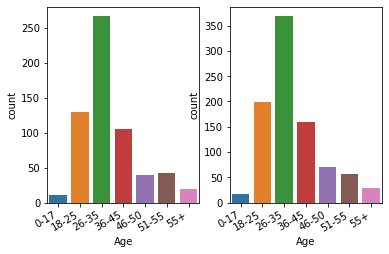

In [44]:
antecedent = antecedent.sort_values('Age', ascending=True)
consequent = consequent.sort_values('Age', ascending=True)
fig, ax = plt1.subplots(1,2)
sns.countplot(antecedent['Age'], ax=ax[0])
sns.countplot(consequent['Age'], ax=ax[1])
fig.autofmt_xdate()

#### These graphs shows the products 'P00193542' and 'P00120042' and how many transactions they have been in, and distributed by age. We chose these products because they had good scores overall and the highest lift of all rules. 

What the graphs tells us is that the difference in the age distribution between customers buying these products is close to non-existent, and the biggest difference is that the consequent (right one) has more transactions than the antecedent. We were hoping for a bigger difference between these two products, but because they are so often bought together it's not that suprising that the distribution looks almost the same. 